In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ccdata/CC GENERAL.csv


# Read Data

In [2]:
df=pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')

# Data Inspection

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.shape

(8950, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# Checking Missing Values

In [7]:
df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [8]:
# Filling missing value with median

In [9]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median(),inplace=True)

In [10]:
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.median(),inplace=True)

In [11]:
df.isna().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

No missing values, Data is clean now

# Checking Outliers

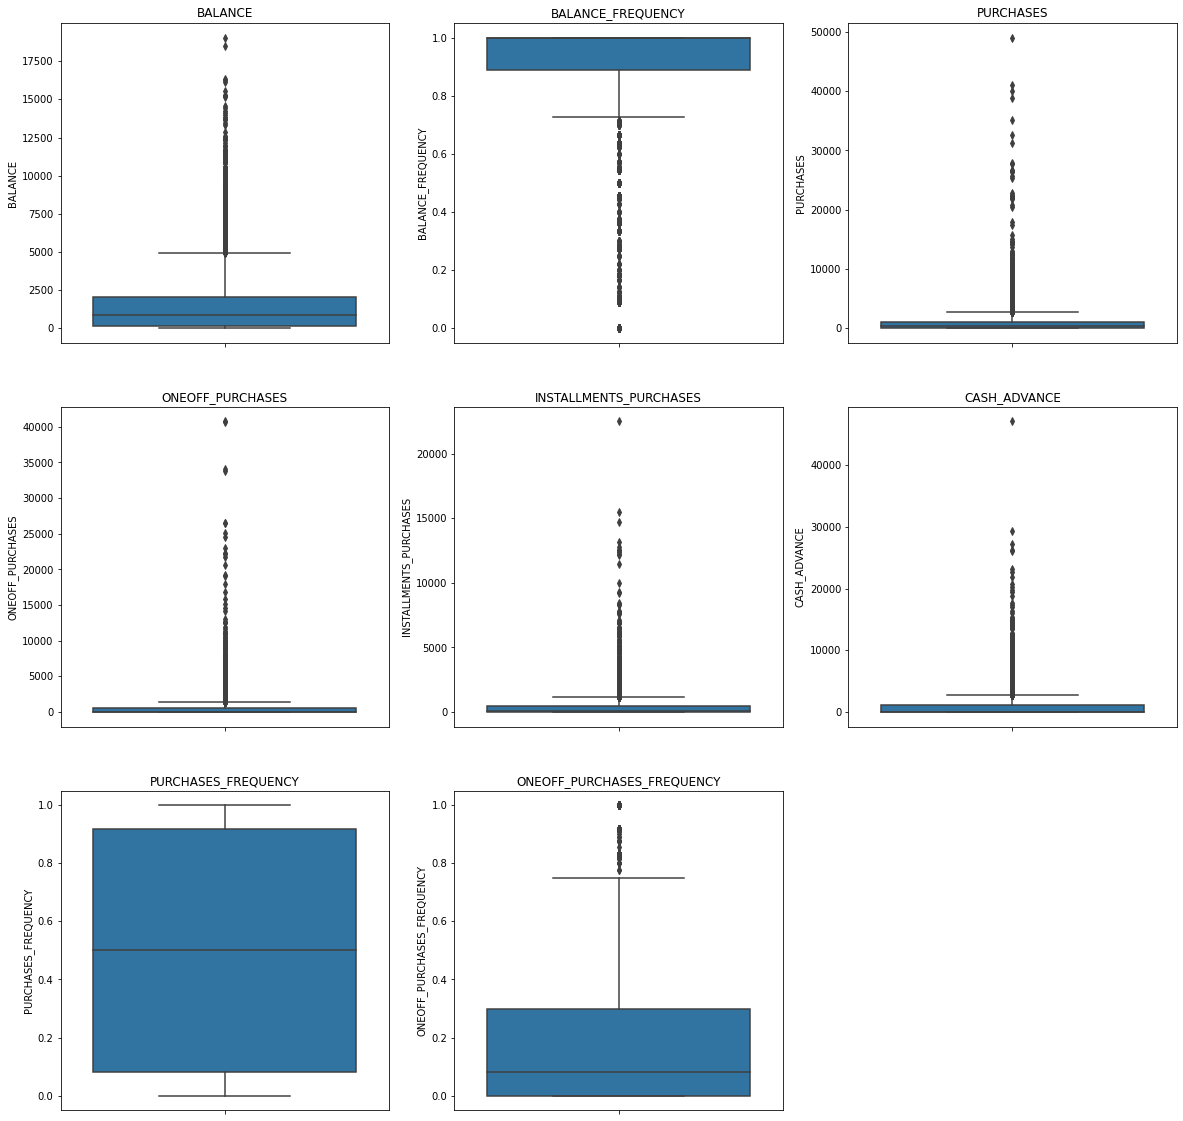

In [12]:
i = 1
plt.figure(figsize=(20,20))
for x in df.columns[1:]:
    if i != 9:
        plt.subplot(3,3,i)
        sns.boxplot(y=df[x])
        plt.title(x)
    else:
        break
    i+=1

No outliers, all data points are in clusters and other higher points are acceptable

In [13]:
# Converting into numerical

In [14]:
def convert(s):
    return int(s[1:])

In [15]:
df.CUST_ID=df.CUST_ID.apply(convert)

# Selecting 2 Columns 

CUSTID : Identification of Credit Card holder \
BALANCE : Balance amount left in their account to make purchases 

# Targeting customer card holder that have high balance left in their account 

<AxesSubplot:xlabel='BALANCE', ylabel='CUST_ID'>

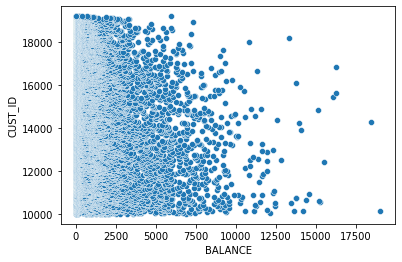

In [16]:
sns.scatterplot(x=df.BALANCE,y=df.CUST_ID)

In [17]:
X = df[['CUST_ID','BALANCE']]

In [18]:
X

,CUST_ID,BALANCE
0,10001,40.900749
1,10002,3202.467416
2,10003,2495.148862
3,10004,1666.670542
4,10005,817.714335
...,...,...
8945,19186,28.493517
8946,19187,19.183215
8947,19188,23.398673
8948,19189,13.457564


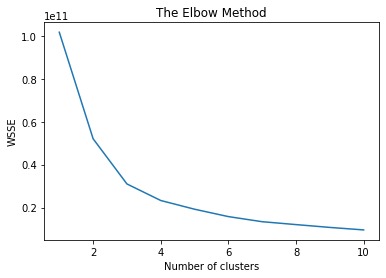

In [19]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')#Within Cluster sum of squares
plt.show()

In [20]:
km = KMeans(n_clusters=4,random_state=10)
Y_pred=km.fit_predict(X)

In [21]:
X['cluster'] = Y_pred
X

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CUST_ID,BALANCE,cluster
0,10001,40.900749,1
1,10002,3202.467416,1
2,10003,2495.148862,1
3,10004,1666.670542,1
4,10005,817.714335,1
...,...,...,...
8945,19186,28.493517,2
8946,19187,19.183215,2
8947,19188,23.398673,2
8948,19189,13.457564,2


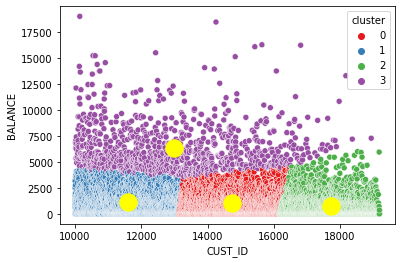

In [22]:
sns.scatterplot( data=X, x='CUST_ID', y='BALANCE',
           hue='cluster',palette="Set1")  

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s = 300, c = 'yellow')
plt.show()

In [23]:
X['cluster']=X.cluster.map({0:'No',1:'No',2:'Target',3:'No'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
X

,CUST_ID,BALANCE,cluster
0,10001,40.900749,No
1,10002,3202.467416,No
2,10003,2495.148862,No
3,10004,1666.670542,No
4,10005,817.714335,No
...,...,...,...
8945,19186,28.493517,Target
8946,19187,19.183215,Target
8947,19188,23.398673,Target
8948,19189,13.457564,Target


In [25]:
newdf1 = df.copy()

In [26]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [27]:
newdf1['cluster'] = X['cluster']

In [28]:
newdf1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,No
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,No
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,No
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,No
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,No


In [29]:
target1 = newdf1[newdf1.cluster=='Target']

In [30]:
target1

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6013,16182,37.324758,0.166667,0.00,0.00,0.00,720.142017,0.000000,0.000000,0.000000,0.166667,6,0,4000.0,0.000000,312.343947,0.000000,6,Target
6014,16184,1.956658,0.272727,393.71,168.71,225.00,0.000000,0.416667,0.166667,0.250000,0.000000,0,6,1700.0,178.707279,312.343947,0.000000,12,Target
6018,16188,4.930929,0.444444,189.72,0.00,189.72,0.000000,1.000000,0.000000,0.888889,0.000000,0,9,1500.0,284.411628,19.278758,0.166667,9,Target
6020,16190,214.592814,0.363636,0.00,0.00,0.00,1306.528549,0.000000,0.000000,0.000000,0.083333,3,0,3000.0,28.361650,79.103048,0.000000,12,Target
6024,16194,18.906225,0.272727,143.73,0.00,143.73,0.000000,0.250000,0.000000,0.166667,0.000000,0,3,2500.0,0.000000,312.343947,0.000000,12,Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,Target
8946,19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,Target
8947,19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,Target
8948,19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,Target


# Select 2 Columns

# Targeting Customer card holders that have made higher amount of purchases

<AxesSubplot:xlabel='PURCHASES', ylabel='CUST_ID'>

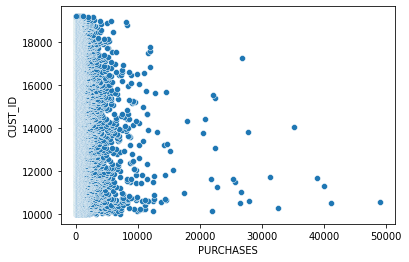

In [31]:
sns.scatterplot(x=df.PURCHASES,y=df.CUST_ID)

In [32]:
X = df[['CUST_ID','PURCHASES']]

In [33]:
X

,CUST_ID,PURCHASES
0,10001,95.40
1,10002,0.00
2,10003,773.17
3,10004,1499.00
4,10005,16.00
...,...,...
8945,19186,291.12
8946,19187,300.00
8947,19188,144.40
8948,19189,0.00


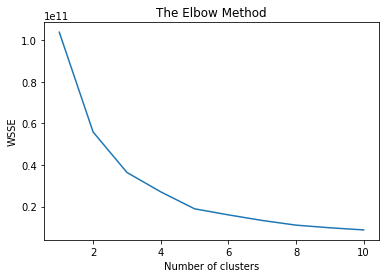

In [34]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')#Within Cluster sum of squares
plt.show()

In [35]:
km = KMeans(n_clusters=3,random_state=10)
Y_pred=km.fit_predict(X)

In [36]:
X['cluster'] = Y_pred
X

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CUST_ID,PURCHASES,cluster
0,10001,95.40,1
1,10002,0.00,1
2,10003,773.17,1
3,10004,1499.00,1
4,10005,16.00,1
...,...,...,...
8945,19186,291.12,0
8946,19187,300.00,0
8947,19188,144.40,0
8948,19189,0.00,0


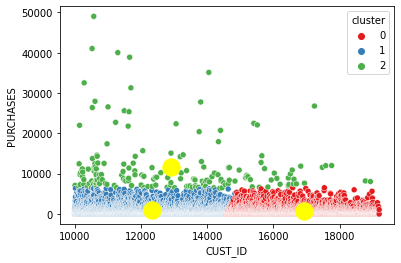

In [37]:
sns.scatterplot( data=X, x='CUST_ID', y='PURCHASES',
           hue='cluster',palette="Set1")  

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s = 300, c = 'yellow')
plt.show()

In [38]:
X['cluster']=X.cluster.map({0:'No',1:'No',2:'Target'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
X

,CUST_ID,PURCHASES,cluster
0,10001,95.40,No
1,10002,0.00,No
2,10003,773.17,No
3,10004,1499.00,No
4,10005,16.00,No
...,...,...,...
8945,19186,291.12,No
8946,19187,300.00,No
8947,19188,144.40,No
8948,19189,0.00,No


In [40]:
newdf2 = df.copy()
newdf2['cluster'] = X['cluster']

In [41]:
newdf2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,No
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,No
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,No
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,No
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,No


In [42]:
target2 = newdf2[newdf2.cluster=='Target']

In [43]:
target2.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6,10007,627.260806,1.0,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.0,0.00,0,64,13500.0,6354.314328,198.065894,1.0,12,Target
120,10125,8504.876253,1.0,6724.26,4100.08,2624.18,1686.599777,1.000000,0.916667,1.0,0.50,10,85,17000.0,1888.756861,2167.446204,0.0,12,Target
125,10131,2392.917738,1.0,12462.44,12462.44,0.00,0.000000,0.916667,0.916667,0.0,0.00,0,217,2800.0,11628.715570,2000.990921,0.0,12,Target
138,10144,19043.138560,1.0,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.0,0.00,0,216,18000.0,23018.575830,18621.013310,0.0,12,Target
153,10159,13673.079610,1.0,9792.23,3959.81,5832.42,2444.445738,1.000000,0.750000,1.0,0.75,26,216,20000.0,11717.307940,6042.391629,0.0,12,Target


# Selecting 2 Columns

PAYMENTS : Amount of Payment done by user \
CUSTID : Identification of Credit Card holder 

# Targeting Customers that have made high payments

<AxesSubplot:xlabel='PAYMENTS', ylabel='CUST_ID'>

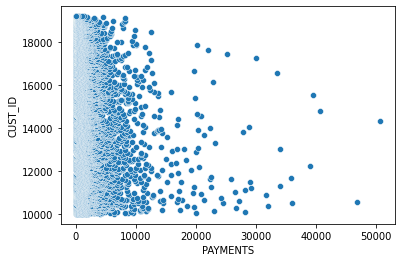

In [44]:
sns.scatterplot(x=df.PAYMENTS,y=df.CUST_ID)

In [45]:
X = df[['CUST_ID','PAYMENTS']]

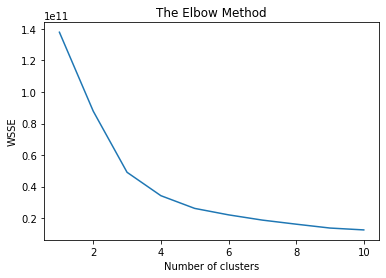

In [46]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')#Within Cluster sum of squares
plt.show()

In [47]:
km = KMeans(n_clusters=3,random_state=10)
Y_pred=km.fit_predict(X)

In [48]:
X['cluster'] = Y_pred
X

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CUST_ID,PAYMENTS,cluster
0,10001,201.802084,1
1,10002,4103.032597,1
2,10003,622.066742,1
3,10004,0.000000,1
4,10005,678.334763,1
...,...,...,...
8945,19186,325.594462,0
8946,19187,275.861322,0
8947,19188,81.270775,0
8948,19189,52.549959,0


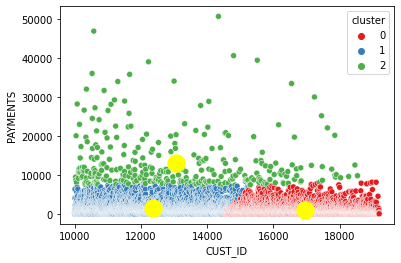

In [49]:
sns.scatterplot( data=X, x='CUST_ID', y='PAYMENTS',
           hue='cluster',palette="Set1")  

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s = 300, c = 'yellow')
plt.show()

In [50]:
X['cluster']=X.cluster.map({0:'No',1:'No',2:'Target'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
X

,CUST_ID,PAYMENTS,cluster
0,10001,201.802084,No
1,10002,4103.032597,No
2,10003,622.066742,No
3,10004,0.000000,No
4,10005,678.334763,No
...,...,...,...
8945,19186,325.594462,No
8946,19187,275.861322,No
8947,19188,81.270775,No
8948,19189,52.549959,No


In [52]:
newdf3 = df.copy()

In [53]:
newdf3['cluster'] = X['cluster']

In [54]:
newdf3.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,No
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,No
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,No
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,No
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,No


In [55]:
target3 = newdf3[newdf3.cluster=='Target']

In [56]:
target3.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
23,10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,Target
34,10035,3517.101616,0.727273,547.28,0.00,547.28,0.000000,1.000000,0.000000,1.000000,0.000000,0,14,11000.0,8735.607835,17862.558310,0.000000,12,Target
39,10040,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6,6,7500.0,20071.075440,719.948985,0.333333,12,Target
50,10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8,Target
71,10074,2990.422186,0.909091,4523.27,1664.09,2859.18,27296.485760,0.666667,0.500000,0.583333,0.833333,27,33,7000.0,28232.694460,1107.030803,0.454545,12,Target


# Select 2 Colummns

CASHADVANCE : Cash in advance given by the user \
CUSTID : Identification of Credit Card holder 

# Targeting Customers that make high advance payments

<AxesSubplot:xlabel='CASH_ADVANCE', ylabel='CUST_ID'>

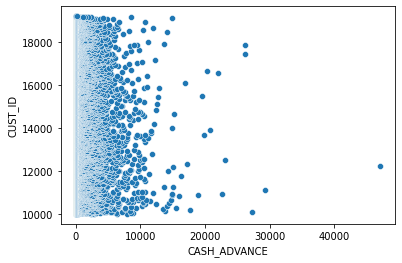

In [57]:
sns.scatterplot(x=df.CASH_ADVANCE,y=df.CUST_ID)

In [58]:
X = df[['CUST_ID','CASH_ADVANCE']]

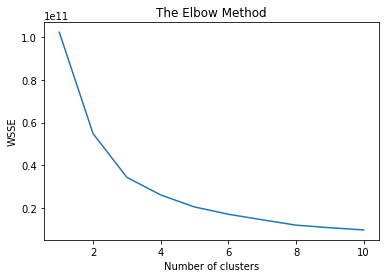

In [59]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')#Within Cluster sum of squares
plt.show()

In [60]:
km = KMeans(n_clusters=3,random_state=10)
Y_pred=km.fit_predict(X)

In [61]:
X['cluster'] = Y_pred


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


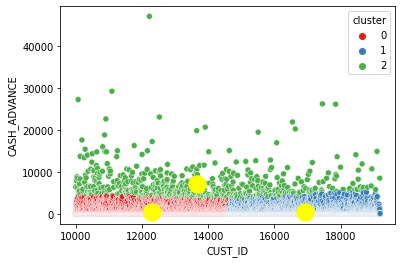

In [62]:
sns.scatterplot( data=X, x='CUST_ID', y='CASH_ADVANCE',
           hue='cluster',palette="Set1")  

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s = 300, c = 'yellow')
plt.show()

In [63]:
X['cluster']=X.cluster.map({0:'No',1:'No',2:'Target'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
newdf4 = df.copy()

In [65]:
newdf4['cluster'] = X['cluster']

In [66]:
target4 = newdf4[newdf4.cluster=='Target']

In [67]:
target4

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Target
23,10024,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,Target
36,10037,7427.076941,1.000000,0.00,0.00,0.00,8873.375046,0.000000,0.000000,0.000000,0.727273,11,0,9000.0,1636.361601,1986.843608,0.000000,11,Target
39,10040,1411.602230,0.454545,963.24,963.24,0.00,6173.682877,0.083333,0.083333,0.000000,0.333333,6,6,7500.0,20071.075440,719.948985,0.333333,12,Target
50,10052,4931.331857,1.000000,901.42,646.07,255.35,8530.648614,0.625000,0.375000,0.250000,0.875000,37,9,12000.0,8113.297346,1012.415961,0.000000,8,Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8684,18921,1929.555023,1.000000,621.11,621.11,0.00,6691.286753,0.333333,0.333333,0.000000,0.666667,29,5,6000.0,2406.905963,549.027080,0.000000,12,Target
8705,18942,7302.672686,1.000000,0.00,0.00,0.00,10762.707760,0.000000,0.000000,0.000000,0.750000,19,0,9000.0,3824.308564,2214.506825,0.000000,12,Target
8813,19053,3335.053583,0.700000,0.00,0.00,0.00,5823.467109,0.000000,0.000000,0.000000,0.300000,3,0,7000.0,931.371718,1006.983314,0.000000,10,Target
8857,19098,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,Target


# Select 2 columns

CREDITLIMIT : Limit of Credit Card for user \
CUSTID : Identification of Credit Card holder 

# Selection customers that have high credit card limit

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='CUST_ID'>

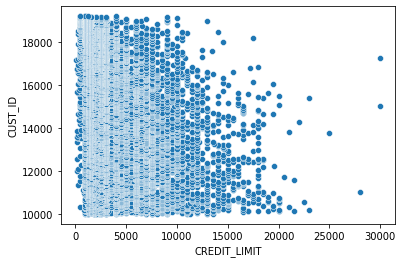

In [68]:
sns.scatterplot(x=df.CREDIT_LIMIT,y=df.CUST_ID)

In [69]:
X = df[['CUST_ID','CREDIT_LIMIT']]

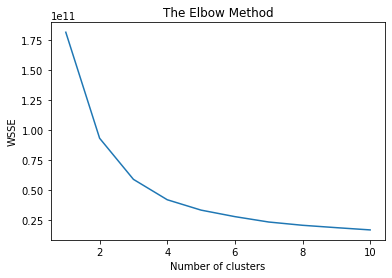

In [70]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=10)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')#Within Cluster sum of squares
plt.show()

In [71]:
km = KMeans(n_clusters=4,random_state=10)
Y_pred=km.fit_predict(X)

In [72]:
X['cluster'] = Y_pred


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


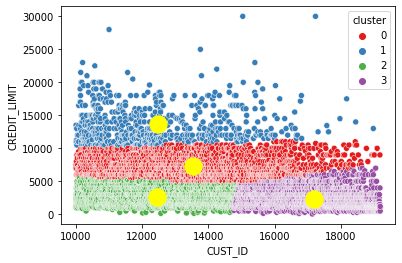

In [73]:
sns.scatterplot( data=X, x='CUST_ID', y='CREDIT_LIMIT',
           hue='cluster',palette="Set1")  

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 
            s = 300, c = 'yellow')
plt.show()

In [74]:
X['cluster']=X.cluster.map({0:'Target',1:'No',2:'No',3:'No'})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
newdf5 = df.copy()

In [76]:
newdf5['cluster'] = X['cluster']

In [77]:
newdf5.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,No
1,10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Target
2,10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Target
3,10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,Target
4,10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,No


In [78]:
target5 = newdf5[newdf5.cluster=='Target']

In [79]:
target5.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.00,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,Target
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.00,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,Target
3,10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.00,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,Target
8,10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.25,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,Target
13,10014,921.693369,1.000000,2137.93,419.96,1717.97,0.000000,0.750000,0.166667,0.75,0.000000,0,26,7500.0,1655.891435,251.137986,0.083333,12,Target


# Final Target Customers

In [80]:
target1.shape

(2803, 19)

In [81]:
target2.shape

(173, 19)

In [82]:
target3.shape

(313, 19)

In [83]:
target4.shape

(540, 19)

In [84]:
target5.shape

(2302, 19)

In [85]:
final_target = pd.concat([target1,target2,target3,target4,target5])

In [86]:
final_target.shape

(6131, 19)

In [87]:
# Removing similar records
final_target.drop_duplicates(inplace=True)

In [88]:
final_target.shape

(5227, 19)

# Final CSV of Target Customers

In [89]:
final_target.to_csv('Target_Customers.csv')

In [90]:
pd.read_csv('Target_Customers.csv',index_col=0)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6013,16182,37.324758,0.166667,0.00,0.00,0.00,720.142017,0.000000,0.000000,0.000000,0.166667,6,0,4000.0,0.000000,312.343947,0.000000,6,Target
6014,16184,1.956658,0.272727,393.71,168.71,225.00,0.000000,0.416667,0.166667,0.250000,0.000000,0,6,1700.0,178.707279,312.343947,0.000000,12,Target
6018,16188,4.930929,0.444444,189.72,0.00,189.72,0.000000,1.000000,0.000000,0.888889,0.000000,0,9,1500.0,284.411628,19.278758,0.166667,9,Target
6020,16190,214.592814,0.363636,0.00,0.00,0.00,1306.528549,0.000000,0.000000,0.000000,0.083333,3,0,3000.0,28.361650,79.103048,0.000000,12,Target
6024,16194,18.906225,0.272727,143.73,0.00,143.73,0.000000,0.250000,0.000000,0.166667,0.000000,0,3,2500.0,0.000000,312.343947,0.000000,12,Target
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7276,17472,6256.556896,1.000000,0.00,0.00,0.00,2045.731359,0.000000,0.000000,0.000000,0.416667,14,0,6500.0,1573.751794,2135.483305,0.000000,12,Target
7428,17631,6631.790101,1.000000,74.17,74.17,0.00,4618.934859,0.090909,0.090909,0.000000,0.454545,10,1,9000.0,1652.029653,1516.892745,0.000000,11,Target
7513,17716,6388.820712,1.000000,5154.75,1622.06,3532.69,0.000000,1.000000,0.500000,1.000000,0.000000,0,115,9500.0,6436.518476,1823.789613,0.000000,12,Target
7596,17802,7114.235621,1.000000,1072.24,1000.00,72.24,2088.213086,0.666667,0.083333,0.583333,0.250000,7,9,10000.0,1837.750949,2449.812844,0.000000,12,Target
